In [1]:
# 1. Decision trees
# (a)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('biden.csv', sep = ',')

y = data['biden'].values
X = data[['female', 'age', 'dem', 'rep', 'educ']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
tree_1 = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 3)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

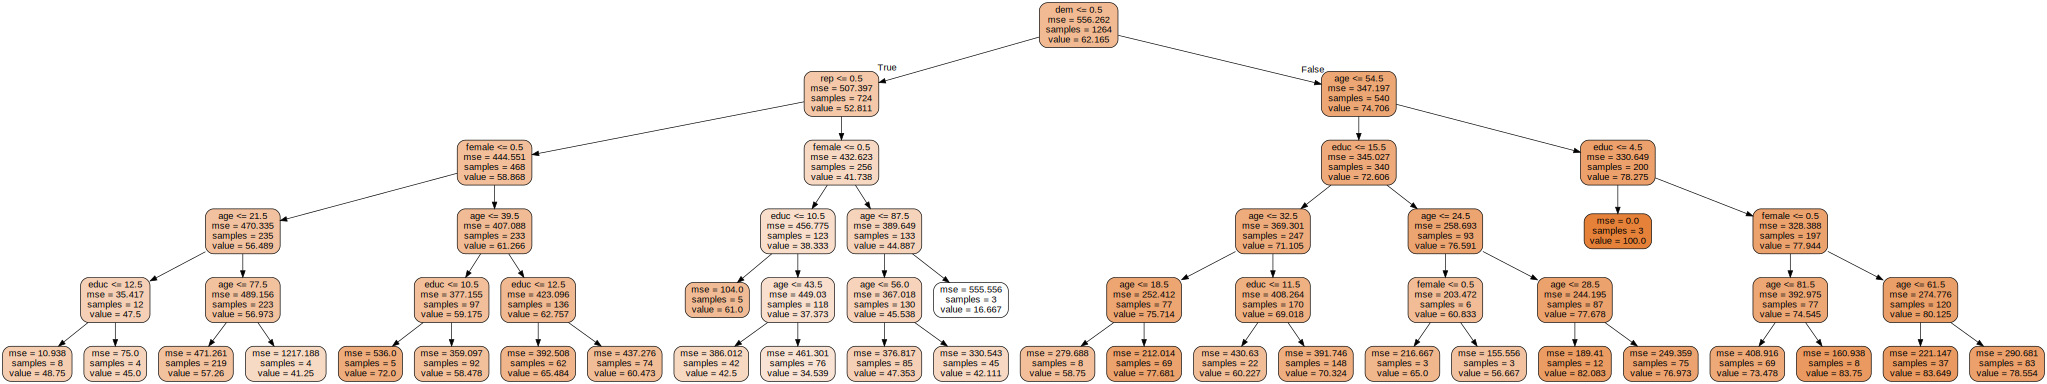

In [7]:
tree_viz_1 = export_graphviz(tree_1, out_file = None, rounded = True, filled = True,
             feature_names = ['female', 'age', 'dem', 'rep', 'educ'])
graph = graphviz.Source(tree_viz_1)
graph.render('tree_viz_1')
graph

In [8]:
y_pred = tree_1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE =', MSE1)

MSE = 406.67204914577894


If no restriction is added to the decision tree, the decision tree will become a really complex one with the problem of overfitting, which makes it hard to explain. Therefore, I utilized extra control max_depth = 5 and min_samples_leaf = 3.

In this decision tree, I focus on the top three layers in interpreting the result.

- If not Democrat: 
            - if not Republican - if male   - then feel 56.489 warmth towards Biden
                                - if female - then feel 61.266 warmth towards Biden
            - if Republican     - if male   - then feel 38.333 warmth towards Biden
                                - if female - then feel 44.887 warmth towards Biden
- If Democrat: 
            - if age <= 54.5    - if educ <= 15.5 - then feel 71.105 warmth towards Biden
                                - if educ > 15.5  - then feel 76.591 warmth towards Biden
            - if educ <= 4.5    - then feel 100 warmth towards Biden
                                - then feel 77.994 warmth towards Biden

Overall, a not well-educated Democrat is predicted to show the most welcome attitude towards Biden.
And a male Republican is predicted to show the less welcome attitude towards Biden.

The test MSE is 406.67204914577894.

In [10]:
# (b)
depth_result = []
MSE_result = []
for i in range(1, 21):
    tree_2 = DecisionTreeRegressor(max_depth = i, min_samples_leaf = 5)
    tree_2.fit(X_train, y_train)
    y_pred_2 = tree_2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred_2)
    depth_result += [i]
    MSE_result += [MSE2]
    print("max_depth = ", i, "MSE = ", MSE2)

max_depth =  1 MSE =  420.0224529349668
max_depth =  2 MSE =  400.06539818418173
max_depth =  3 MSE =  396.1937146321307
max_depth =  4 MSE =  404.59602362340974
max_depth =  5 MSE =  411.80592737244535
max_depth =  6 MSE =  418.6022666314934
max_depth =  7 MSE =  437.8869249136812
max_depth =  8 MSE =  462.7752812506661
max_depth =  9 MSE =  462.3674415271974
max_depth =  10 MSE =  468.4803016091758
max_depth =  11 MSE =  472.93714573994737
max_depth =  12 MSE =  478.69286911070185
max_depth =  13 MSE =  479.1313267112563
max_depth =  14 MSE =  479.93391163302533
max_depth =  15 MSE =  479.5850023678152
max_depth =  16 MSE =  482.9896985004119
max_depth =  17 MSE =  482.81587206375985
max_depth =  18 MSE =  480.6980083436862
max_depth =  19 MSE =  480.87183478033825
max_depth =  20 MSE =  482.81587206375985


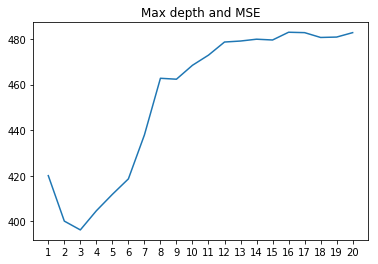

In [15]:
plt.plot(depth_result, MSE_result)
plt.title("Max depth and MSE")
plt.xticks(depth_result)
plt.show()

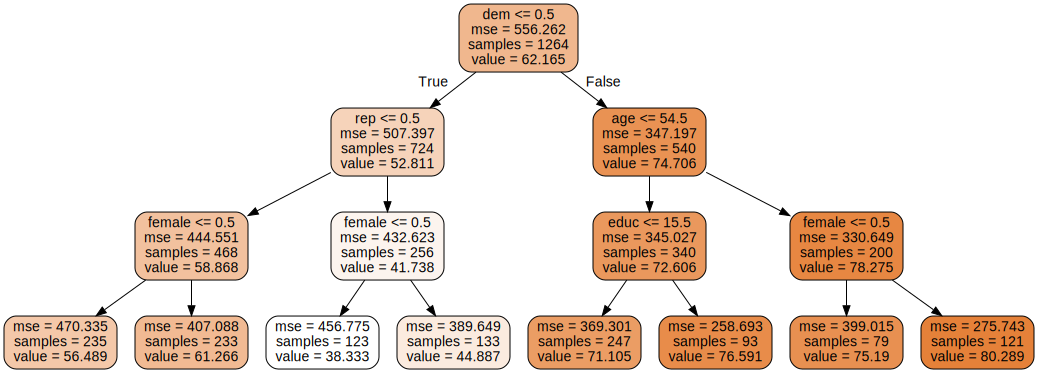

In [16]:
tree_2 = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
tree_2.fit(X_train, y_train)
tree_viz_2 = export_graphviz(tree_2, out_file = None, rounded = True, filled = True,
             feature_names = ['female', 'age', 'dem', 'rep', 'educ'])
graph = graphviz.Source(tree_viz_2)
graph.render('tree_viz_2')
graph

The optimal level is 3. The tree structure is as follow:

- If not Democrat: 
            - if not Republican - if male   - then feel 56.489 warmth towards Biden
                                - if female - then feel 61.266 warmth towards Biden
            - if Republican     - if male   - then feel 38.333 warmth towards Biden
                                - if female - then feel 44.887 warmth towards Biden
- If Democrat: 
            - if age <= 54.5    - if educ <= 15.5 - then feel 71.195 warmth towards Biden
                                - if educ > 15.5  - then feel 76.591 warmth towards Biden
            - if age > 54.5     - if male         - then feel 75.190 warmth towards Biden
                                - if female       - then feel 80.289 warmth towards Biden

Overall, an old female Democrat is predicted to show the most welcome attitude towards Biden.
And a male Republican is predicted to show the less welcome attitude towards Biden.

The test MSE is 396.1937146321307. Pruning the tree greatly imporve the MSE.

In [17]:
# (c)
tree_3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 100, max_samples = 100, 
                          bootstrap = True, oob_score = True, random_state = 15)
tree_3.fit(X, y)
tree_3.score(X, y)
y_pred3 = tree_3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE = ', MSE3)

MSE =  406.4277611889028


In [18]:
mean = np.mean([tree.feature_importances_ for tree in tree_3.estimators_], axis = 0)
std = np.std([tree.feature_importances_ for tree in tree_3.estimators_], axis = 0)
indices = np.argsort(mean)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']
sorted_features = []

for f in range(X.shape[1]):
    print(str(f + 1), ". ", features[indices[f]], ": ", str(mean[indices[f]]))
    sorted_features += [features[indices[f]]]

Feature ranking:
1 .  age :  0.44129199160325827
2 .  educ :  0.20131496850812605
3 .  dem :  0.19031603969918995
4 .  rep :  0.10652080029450273
5 .  female :  0.06055619989492299


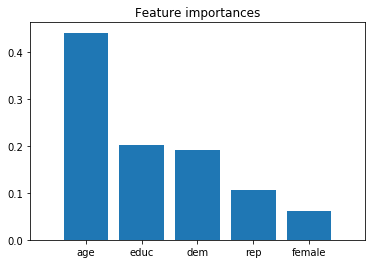

In [19]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), mean[indices], align = "center")
plt.xticks(range(X.shape[1]), sorted_features)
plt.xlim([-1, X.shape[1]])
plt.show()

On average, age is the most powerful factor in determining the structure of decision tree using bagging method, followed by educ and dem. Rep is less powerful, but female is the least powerful factor.

The test MSE for bagging method is 406.4277611889028.


m =  1
MSE = 535.4408894272707
Feature ranking:
1 .  age :  0.5168052580701701
2 .  dem :  0.17336717778541216
3 .  educ :  0.14488682882677262
4 .  rep :  0.1424260812336414
5 .  female :  0.02251465408400391


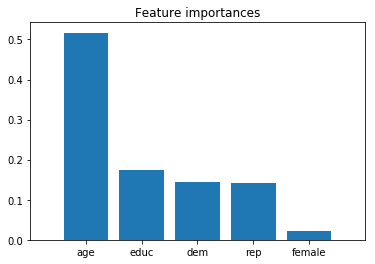


m =  2
MSE = 534.2234102258054
Feature ranking:
1 .  age :  0.5060057127693167
2 .  dem :  0.16757618588495385
3 .  educ :  0.15311769579923454
4 .  rep :  0.14967746616813501
5 .  female :  0.023622939378359974


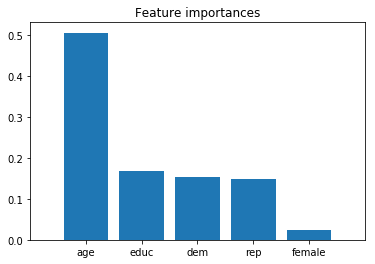


m =  3
MSE = 536.4823587594484
Feature ranking:
1 .  age :  0.49622158598298105
2 .  dem :  0.1965218092353996
3 .  educ :  0.15409369740212187
4 .  rep :  0.1256165992402622
5 .  female :  0.027546308139235243


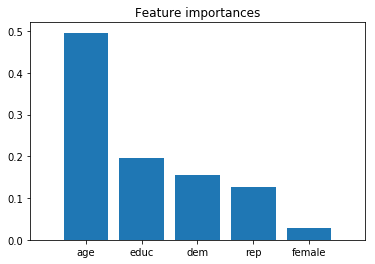

In [26]:
# (d)
for i in range(1,4):
    print()
    print("m = ", i)
    
    tree_4 = RandomForestRegressor(n_estimators = 53, max_features = i, bootstrap = True,
                                   oob_score = True, random_state = 15)
    tree_4.fit(X, y)
    tree_4.score(X, y)
    y_pred4 = tree_4.oob_prediction_
    MSE4 = mean_squared_error(y, y_pred4)
    print('MSE =', MSE4)
    
    importances = tree_4.feature_importances_
    std = np.std([tree.feature_importances_ for tree in tree_4.estimators_], axis = 0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")

    features = ['female', 'age', 'dem', 'rep', 'educ']
    sort_features = []
    for f in range(X.shape[1]):
        print(str(f+1), ". ", features[indices[f]], ": ",str(importances[indices[f]]))
        sorted_features += [ features[indices[f]]]
        
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], align = "center")
    plt.xticks(range(X.shape[1]), sorted_features)
    plt.xlim([-1, X.shape[1]])
    plt.show()

It seems the number of variables considered at each split is not affected by the error rate obtained. The m = 2 model has slightly better MSE, however, the difference is really trivial.

On average, age is the most powerful factor in determining the structure of decision tree using random forest method, followed by educ and dem. Rep is less powerful, but female is the least powerful factor.